A seleção de variáveis é um componente muito importante no fluxo de trabalho de um cientista de dados. 
<br> Quando apresentados dados com altíssima dimensionalidade (quantidade excessiva de colunas), os modelos geralmente apresentam lentidão porque o tempo de treinamento aumenta exponencialmente com o número de features!
<br>
A seleção de recursos é um processo no qual você seleciona automaticamente os recursos em seus dados que mais contribuem para a variável de previsão ou saída em que você está interessado.
<br>
Os modelos tem um risco crescente de overfitting com o aumento do número de colunas, desta forma, perde-se eficácia ao tentar aplicar o modelo aos novos dados.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

In [2]:
data = pd.read_csv('./dataset2/dataset_completo.csv')
print('Quantidade de linhas no Dataset {}'.format(data.shape[0]))
data.head()

Quantidade de linhas no Dataset 14596


,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


### Selecionando somente as variaveis numéricas para nossa análise!

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]
print(data.shape)
data.head()

(14596, 24)


,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


Para simplificar a separação dos dados de treino e teste iremos utilizar o train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print('Dados de teste{}'.format(X_test.shape))

Dados de treino (10217, 23)


Dados de teste(4379, 23)


Seleção de recursos como a maioria das coisas na ciência de dados é altamente dependente de contexto e do conjunto de dados, Desta forma, não há uma solução única para a seleção de recursos. 
<br>
A melhor maneira de avançar é entender o mecanismo de cada método e usá-lo quando necessário.
<br>
Vamos aplicar alguns métodos de seleção de variáveis e verificar o comportamento!

## Mutual information

### Relação entre as variaveis e a variavel target.

Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa. 
<br>
Portanto sua informação mútua é 0.

<br>
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.

<br>
Quanto menor o valor, menos a variavel descreve  a relação com o Target!

<br>
A vantagem de usar informações mútuas sobre o F-Test é que ele se dá bem com a relação não linear entre as variáveis de recursos e de Target.

In [5]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.02988241, 0.03557915, 0.04246898, 0.0423559 , 0.02667628,
       0.03352767, 0.03769464, 0.01080609, 0.04383745, 0.0464798 ,
       0.04437835, 0.00227549, 0.00758049, 0.03264633, 0.0593619 ,
       0.03916076, 0.01133529, 0.02771868, 0.00362783, 0.04810996,
       0.03488859, 0.03300102, 0.02994299])

Geramos o fator de relação entre variáveis e target porém a visualização em número para o ser humano não é agradável.
<br>
Vamos Criar um Series do Pandas com os valores para facilitar a visualização em um plot!

In [6]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values(ascending = False)

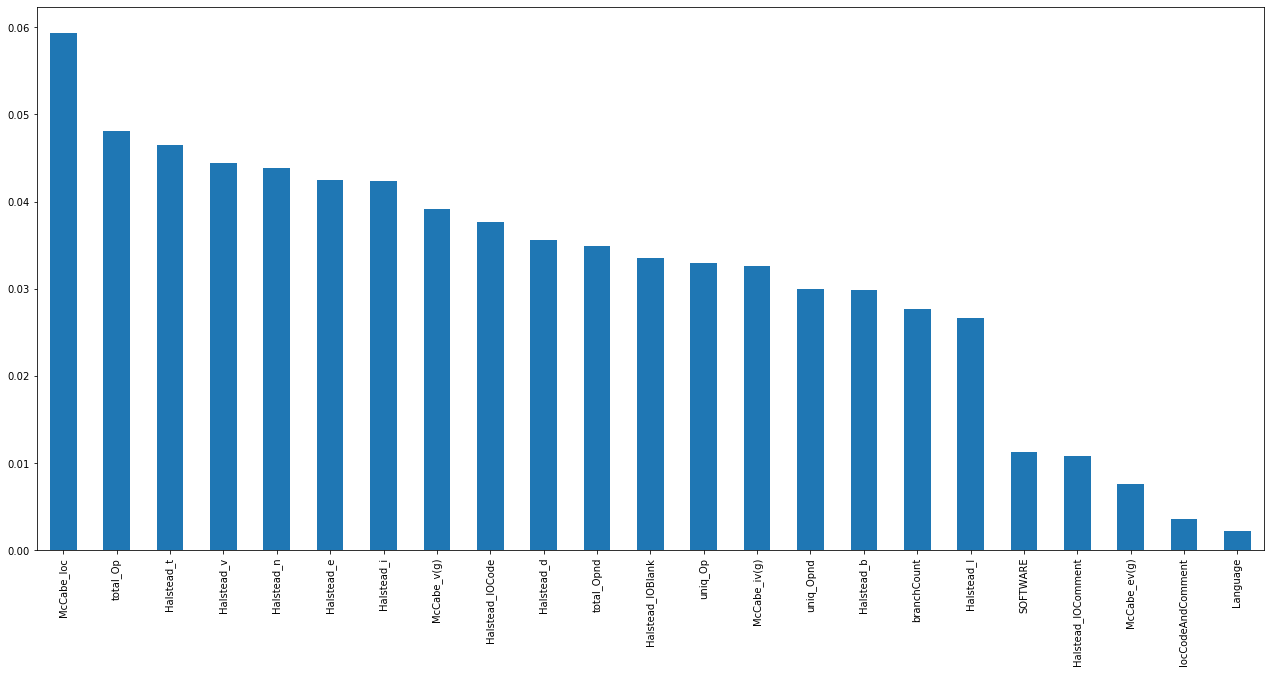

In [7]:
mi.plot.bar(figsize=(22,10));

O código usando a classe SelectKBest da biblioteca feature_selection combinada com o método de máximo coeficiente de informações para selecionar recursos é a seguinte:

In [8]:
sel_ = SelectKBest(mutual_info_classif, k= 10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['Halstead_d', 'Halstead_e', 'Halstead_i', 'Halstead_n', 'Halstead_t',
       'Halstead_v', 'McCabe_loc', 'total_Op', 'total_Opnd', 'uniq_Opnd'],
      dtype='object')

Abaixo estão as melhores features de acordo com o método Mutual Information
<br>
Assim, poderíamos aplicar esta lista no Dataset Original como Slice e trabalhar somente com a variáveis mais relevantes.

In [9]:
list(X_train.columns[sel_.get_support()])

['Halstead_d',
 'Halstead_e',
 'Halstead_i',
 'Halstead_n',
 'Halstead_t',
 'Halstead_v',
 'McCabe_loc',
 'total_Op',
 'total_Opnd',
 'uniq_Opnd']

## Aplicando o método de Regressao (mutual_info_regression)


In [10]:
# Selecionando somente as variaveis numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]

In [11]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((10217, 23), (4379, 23))

## Encontrando o Mutual Information com Regressão!

In [12]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

Halstead_i            0.049198
Halstead_e            0.047761
McCabe_loc            0.044788
Halstead_v            0.044478
Halstead_t            0.039491
Halstead_d            0.038596
Halstead_n            0.038187
Halstead_l            0.034504
total_Opnd            0.032018
uniq_Opnd             0.031154
McCabe_v(g)           0.030736
Halstead_lOCode       0.030423
total_Op              0.029564
Halstead_lOBlank      0.027154
uniq_Op               0.025911
branchCount           0.024832
Halstead_b            0.023302
Halstead_lOComment    0.023266
McCabe_iv(g)          0.021557
locCodeAndComment     0.009160
McCabe_ev(g)          0.005085
SOFTWARE              0.002777
Language              0.000000
dtype: float64

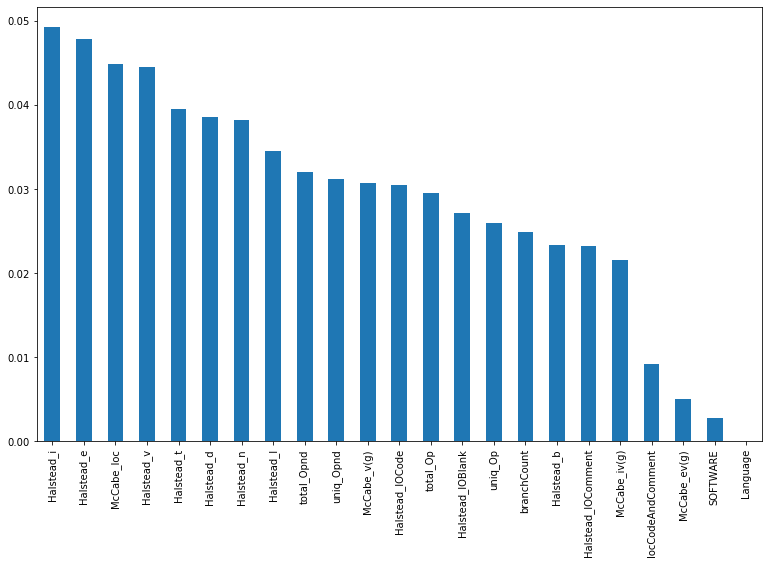

In [13]:
mi.sort_values(ascending=False).plot.bar(figsize = (13,8));

## Aplicando o método  Select Percentile

In [14]:
sel_ = SelectPercentile(mutual_info_regression, percentile= 20).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['Halstead_e', 'Halstead_v', 'McCabe_iv(g)', 'McCabe_loc', 'total_Op'], dtype='object')

In [15]:
for i, y in zip(X_train.columns, sel_.get_support()):
    if y == True:
        print(i,y)

Halstead_e True
Halstead_v True
McCabe_iv(g) True
McCabe_loc True
total_Op True


In [16]:
from sklearn.feature_selection import f_classif, f_regression

# Regressão

In [17]:
data = pd.read_csv('./dataset2/dataset_completo.csv')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]
print(data.shape)
data.head()

(14596, 24)


,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


In [18]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((10217, 23), (4379, 23))

In [19]:
# Calculando os P-Values 

univariate = f_regression(X_train.fillna(0), y_train)

# Utilizado a selecao [1] para selecionar o P-value
univariate = pd.Series(univariate[1])

# Passando as colunas como indices
univariate.index = X_train.columns
univariate.sort_values(ascending = False, inplace = True)


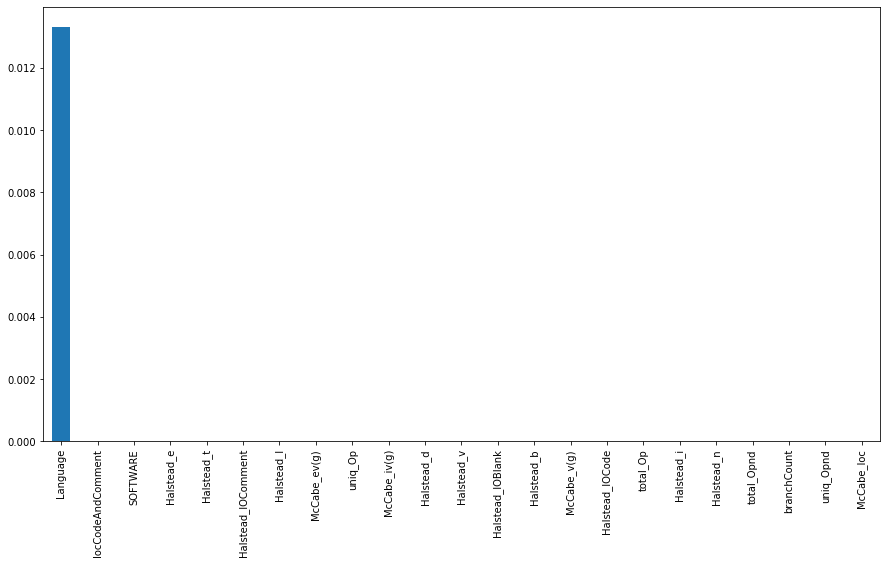

In [20]:
univariate.plot.bar(figsize = (15, 8));

### As variáveis acima dos 0.05 definidos como thershold estão demonstradas acima no plot!

# Selecionando os 10 tops - Percentile

#### Obs: Estes métodos são raramente usados para machine learning, e mais usados para verificar o relacionamento entre as variáveis, facilitando o trabalho para datasets grandes!

In [21]:
sel_ = SelectPercentile(f_regression, percentile= 10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['McCabe_loc', 'branchCount', 'uniq_Opnd'], dtype='object')

# Univariada ROC-AUC ou MSE

* Primeiramente, cria-se uma árvore de decisao para cada variavel.
* Realiza a predição com a árvore de decisao mencionada.
* Ranqueia os itens de acordo com a metrica ROC-AUC ou MSE.
* Seleciona os mais altos índices das variaveis. 

In [22]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [23]:
data = pd.read_csv('./dataset2/dataset_completo.csv')
data.head()

# Selecionando somente as variaveis numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]
print(data.shape)
data.head()

(14596, 24)


,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


In [24]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((10217, 23), (4379, 23))

### Criação do laço para preencher a variavel roc_values com as prediçoes da árvore de decisão!

In [25]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

#### Ordenando as colunas em roc_values para facilitar a visualização

In [26]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False)[0:10]

McCabe_loc          0.694282
uniq_Op             0.678897
uniq_Opnd           0.678535
McCabe_iv(g)        0.678238
branchCount         0.671742
McCabe_v(g)         0.671145
Halstead_l          0.663235
Halstead_lOCode     0.658135
Halstead_lOBlank    0.654683
total_Opnd          0.644578
dtype: float64

#### Pode-se notar que diversas variaveis estão com o mesmo score 0.5

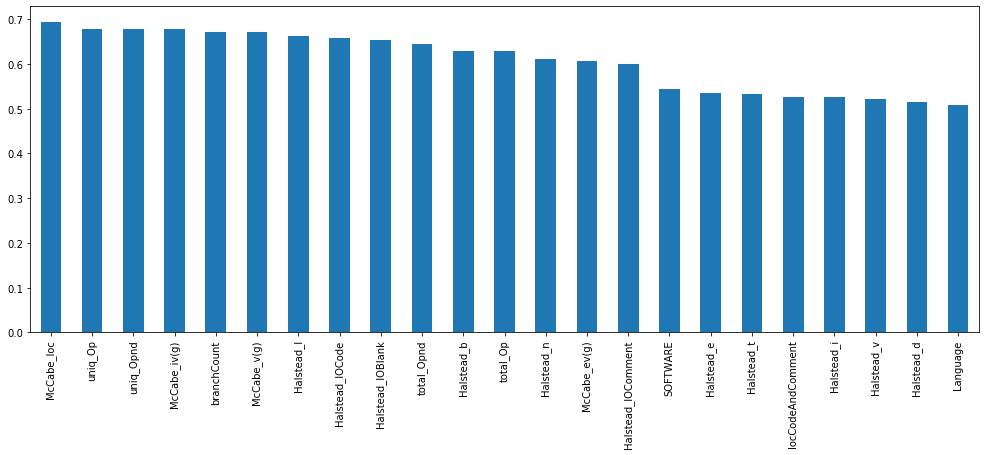

In [27]:
roc_values.sort_values(ascending = False).plot.bar(figsize = (17,6));

### Verificando quantas variaveis estão acima do threshold de 0.5

In [28]:
len(roc_values[roc_values > 0.5])

23

### Exemplo com o caso de Regressão

In [29]:
data = pd.read_csv('./dataset2/dataset_completo.csv')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]
print(data.shape)
data.head()

(14596, 24)


,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1.0,1,1,1.0,1.0,1.0,1.0
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9.0,0,0,44.0,19.0,15.0,15.0
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7.0,0,0,31.0,16.0,16.0,8.0
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11.0,0,0,46.0,26.0,16.0,12.0


In [30]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((10217, 23), (4379, 23))

In [31]:
# Criacao do laco para gerar o classificador de arvore de decisao (MSE)
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [32]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending = False, inplace = True)

In [33]:
mse_values[0:10]

Halstead_e           0.230749
Halstead_t           0.229860
Halstead_i           0.209888
Halstead_v           0.201122
Halstead_d           0.186532
Halstead_n           0.150841
total_Op             0.147550
locCodeAndComment    0.143780
Language             0.143408
total_Opnd           0.143216
dtype: float64

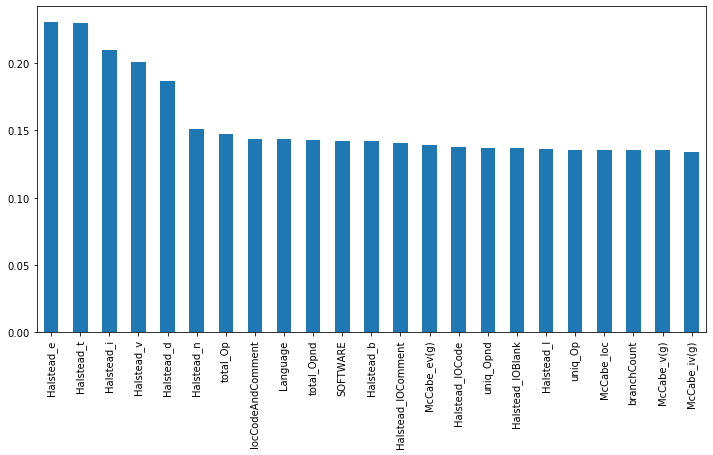

In [34]:
mse_values.plot.bar(figsize = (12,6));

## Vale lembrar que para o caso  de regressão, quanto menor o valor de MSE, melhor!!!
* Metodo útil quando se esta trabalhando com datasets enormes!

* Experimente valores diferentes para as diversas opções de parâmetros e assim verificar quais funcionam melhor para uma tarefa de machine learning.

* A seleção de variáveis é uma etapa crítica de um fluxo de trabalho no aprendizado de máquina. O cientista de dados precisa executar várias iterações para otimizar os dados e modelos.
